# Adaptive Line Enhancer for speech denoising

This notebook does the following:
1. Load speech and noise files, create additive mixture
2. Choose a learning parameter mu, delta time units which is the range of correlation that is used for statistical prediction

In [1]:
import numpy as np
import sys
import os
import matplotlib.pylab as plt

import padasip as pa
from IPython.display import Audio

sys.path.append(os.getcwd())
from ale_anc import AleDenoiser

In [2]:
""" Generate the noisy speech signal from a clean speech signal by adding noise"""
import librosa 

speech_file = "dataset/speech/female.wav"
noise_file = "dataset/noise/noise_white.wav"

s, fs = librosa.load(speech_file, sr=16000)
s = np.concatenate((s, s))

n, fs_noise = librosa.load(noise_file, sr=16000)

noise_gain = 0.7
n = noise_gain * n[:len(s)]

x = s + n

# Compute the Input SNR for signal s to noise n
x_snr = 10*np.log10(np.sum(s**2)/np.sum(n**2))
print("SNR: {:.2f}dB".format(x_snr))

SNR: 18.30dB


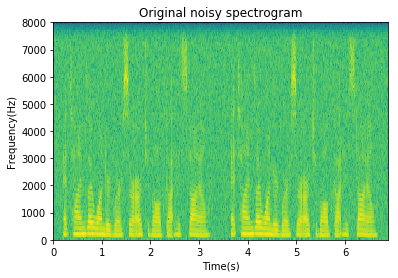

In [3]:
plt.specgram(x, Fs=fs);
plt.title('Original noisy spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');

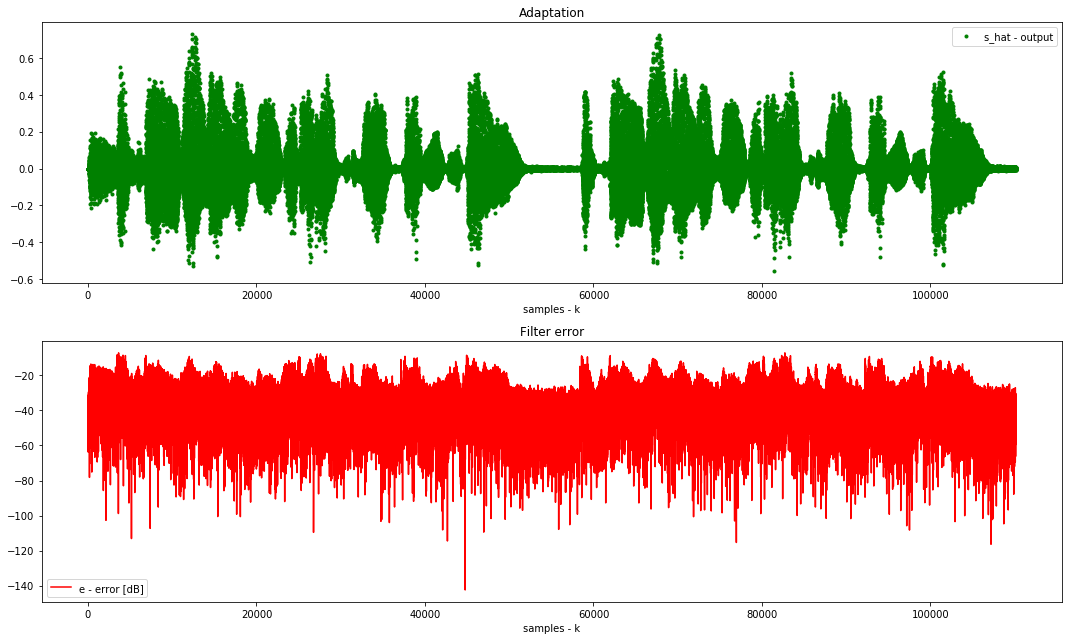

In [4]:
# creation of denoised data
scheme = 1

ale_denoiser = AleDenoiser(fs, scheme=scheme, delta_ms=16)
s_hat, n_hat = ale_denoiser.ale_anc(x)
s_hat2 = ale_denoiser.feed_forward(s)
n_hat2 = ale_denoiser.feed_forward(n)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(s_hat,"g.", label="s_hat - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(n_hat**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

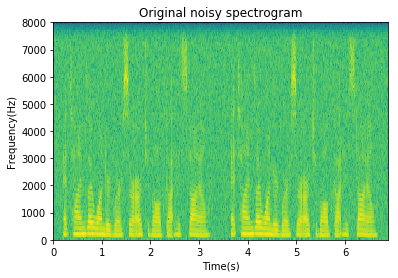

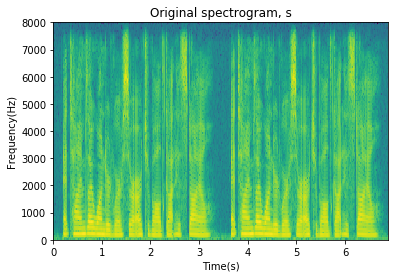

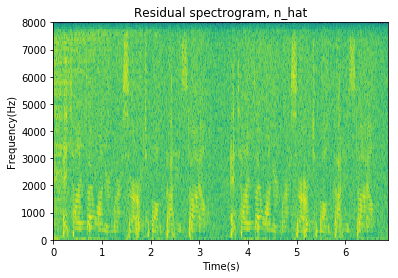

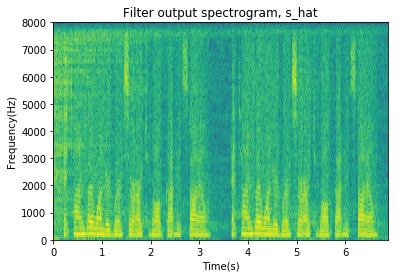

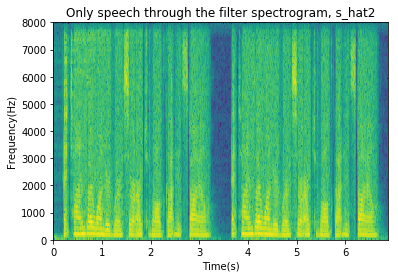

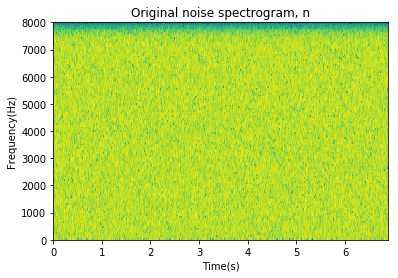

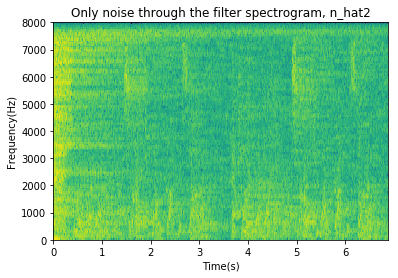

In [5]:
plt.specgram(x, Fs=fs);
plt.title('Original noisy spectrogram');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(s, Fs=fs);
plt.title('Original spectrogram, s');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(n_hat, Fs=fs);
plt.title('Residual spectrogram, n_hat');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(s_hat, Fs=fs);
plt.title('Filter output spectrogram, s_hat');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(s_hat2, Fs=fs);
plt.title('Only speech through the filter spectrogram, s_hat2');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(n, Fs=fs);
plt.title('Original noise spectrogram, n');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');
plt.figure();
plt.specgram(n_hat2, Fs=fs);
plt.title('Only noise through the filter spectrogram, n_hat2');
plt.xlabel('Time(s)');
plt.ylabel('Frequency(Hz)');

In [6]:
Audio(data=s, rate=fs)

In [7]:
Audio(data=x, rate=fs)

In [8]:
Audio(data=n_hat, rate=fs)

In [9]:
Audio(data=s_hat, rate=fs)

In [10]:
Audio(data=s_hat2, rate=fs)

In [11]:
Audio(data=n_hat2, rate=fs)

# Metrics

1. Input SNR
2. Output SNR
3. Input Distortion

In [12]:
# Input SNR

input_snr = 10*np.log10(np.sum(s**2)/np.sum(n**2))
print("Input SNR: {} dB".format(input_snr))

Input SNR: 18.300803899765015 dB


In [14]:
# Output SNR
# Use the last 10% of the audio clip
samp_idx = int(0.1*len(s_hat2));
output_snr = 10*np.log10(np.sum(s_hat2[samp_idx:]**2)/np.sum(n_hat2[samp_idx:]**2))
print("Output SNR: {} dB".format(output_snr))

Output SNR: 22.847884831634055 dB
